<a href="https://colab.research.google.com/github/Muntasir2179/tensorflow-learning/blob/neural-network-regression/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Regression with Neural Networks in TensorFlow

There are difinitions for a regression problem but in our case, we're going to simplify it: predicting a neumerical variable based on some other combination of variables, evem shorter...predicting a number.

In [1]:
# Import TensorFLow
import tensorflow as tf
print(tf.__version__)

2.12.0


## Creating data to view and fit

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

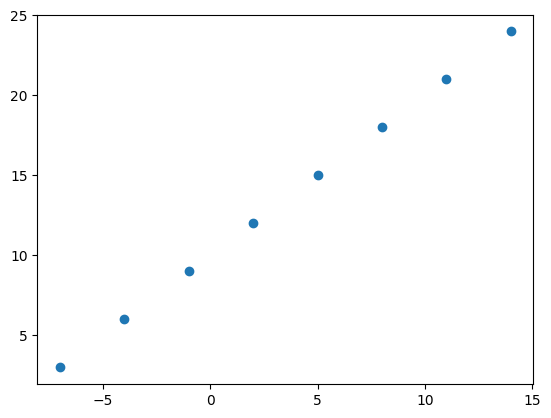

In [3]:
plt.scatter(X, y)

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [5]:
# let's create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [7]:
X = np.reshape(X, (-1, 1))
X

array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]])

In [8]:
# turn our NumPy array into tensor
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modelling with TensorFlow

1. Creting a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation matrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X & y (features and labels).

In [9]:
tf.random.set_seed(42)

In [10]:
# create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 19.7131 - mae: 19.7131
Epoch 2/5
1/1 [==============================] - 0s 15ms/step - loss: 19.4318 - mae: 19.4318
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 19.1506 - mae: 19.1506
Epoch 4/5
1/1 [==============================] - 0s 13ms/step - loss: 18.8693 - mae: 18.8693
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 18.5881 - mae: 18.5881


## Getting prediction form the model

In [11]:
model.predict([17.0])

1/1 [==============================] - 0s 254ms/step


array([[-18.047163]], dtype=float32)

## Improving the model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - Here we might add more layers, increases the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling model** - Here we might change the optimization function or perhaps the learning rate of the optimization function.
3. **Fitting the model** - Here we might fit a model for more epochs (leave ot training for longer) or on more data (give the model more examples to learn from).

### Increasing number of epochs

In [12]:
# lets recreate the model
# Increasing the number of epochs
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 19.2033 - mae: 19.2033
Epoch 2/100
1/1 [==============================] - 0s 26ms/step - loss: 18.9220 - mae: 18.9220
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 18.6408 - mae: 18.6408
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 18.3595 - mae: 18.3595
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 18.0783 - mae: 18.0783
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 17.7970 - mae: 17.7970
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 17.5158 - mae: 17.5158
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 17.2345 - mae: 17.2345
Epoch 9/100
1/1 [==============================] - 0s 56ms/step - loss: 16.9533 - mae: 16.9533
Epoch 10/100
1/1 [==============================] - 0s 28ms/step - loss: 16.6720 - mae: 16.6720
Epoch 11/100
1/1 [==============================] -

In [13]:
# remind ourselves of the data
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [14]:
# let's see if our model's predictino has improved
model.predict([17.0])

1/1 [==============================] - 0s 280ms/step


array([[29.386112]], dtype=float32)

### Adding more hidden units with activation function

In [15]:
# redefining the model but this time we are adding more hidden units
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.7844 - mae: 13.7844
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 13.3494 - mae: 13.3494
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 12.9148 - mae: 12.9148
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 12.4783 - mae: 12.4783
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 12.0377 - mae: 12.0377
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 11.5906 - mae: 11.5906
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 11.1349 - mae: 11.1349
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 10.6682 - mae: 10.6682
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 10.1880 - mae: 10.1880
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 9.6919 - mae: 9.6919
Epoch 11/100
1/1 [==============================] - 0

In [16]:
# remind ourselves of the data
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [17]:
# getting prediction from the model
model.predict([17.0])

1/1 [==============================] - 0s 113ms/step


array([[30.723156]], dtype=float32)

### Changing the optimizatino funciton

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 14.8851 - mae: 14.8851
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 14.0938 - mae: 14.0938
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 13.3126 - mae: 13.3126
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 12.5384 - mae: 12.5384
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 11.7696 - mae: 11.7696
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 11.0042 - mae: 11.0042
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 10.2404 - mae: 10.2404
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 9.4764 - mae: 9.4764
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 8.7100 - mae: 8.7100
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 7.9392 - mae: 7.9392
Epoch 11/100
1/1 [==============================] - 0s 22

In [19]:
model.predict([17.0])

1/1 [==============================] - 0s 108ms/step


array([[27.48275]], dtype=float32)

**🧮🔑Important🔑🧮:** Common ways to improve a deep learning model

*   Adding layers.
*   Increase the number of hidden units.
*   Change the activation function.
*   Change the optimizatino function.
*   Change the learning rate.
*   Fitting on more data.



### Adding more data

It is good idea to visualize:

*  The data - What data are we working with? What does it look like?
*  The model itself - What does our model look like?
*  The training of a model - How does a model performs while it learns?
*  The predictions of the model - How do the prediction of the model line up against the ground truth (the original labels).

In [20]:
# making a bigger dataset
features = tf.range(-100, 100, 4)
labels = features + 10
features, labels

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

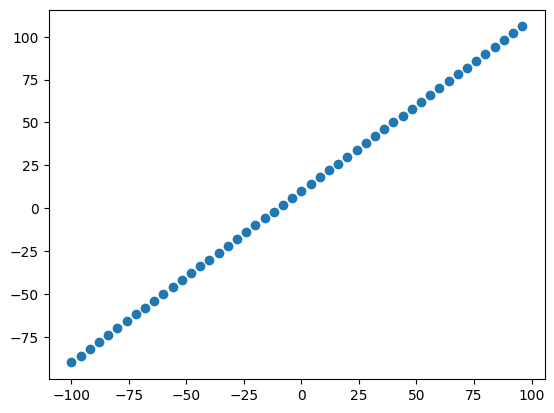

In [21]:
plt.scatter(features, labels)

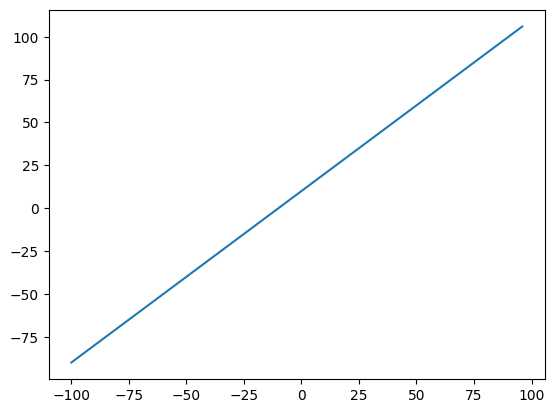

In [22]:
plt.plot(features, labels)

In [23]:
features = tf.reshape(features, shape=(50,1))
features

<tf.Tensor: shape=(50, 1), dtype=int32, numpy=
array([[-100],
       [ -96],
       [ -92],
       [ -88],
       [ -84],
       [ -80],
       [ -76],
       [ -72],
       [ -68],
       [ -64],
       [ -60],
       [ -56],
       [ -52],
       [ -48],
       [ -44],
       [ -40],
       [ -36],
       [ -32],
       [ -28],
       [ -24],
       [ -20],
       [ -16],
       [ -12],
       [  -8],
       [  -4],
       [   0],
       [   4],
       [   8],
       [  12],
       [  16],
       [  20],
       [  24],
       [  28],
       [  32],
       [  36],
       [  40],
       [  44],
       [  48],
       [  52],
       [  56],
       [  60],
       [  64],
       [  68],
       [  72],
       [  76],
       [  80],
       [  84],
       [  88],
       [  92],
       [  96]], dtype=int32)>

In [24]:
# split the data into train and test set
x_train = features[:40, :1]
y_train = labels[:40]

x_test = features[40:, :1]
y_test = labels[40:]

In [25]:
len(x_train), len(x_test), len(y_train), len(y_test)

(40, 10, 40, 10)

## Visualizing the data

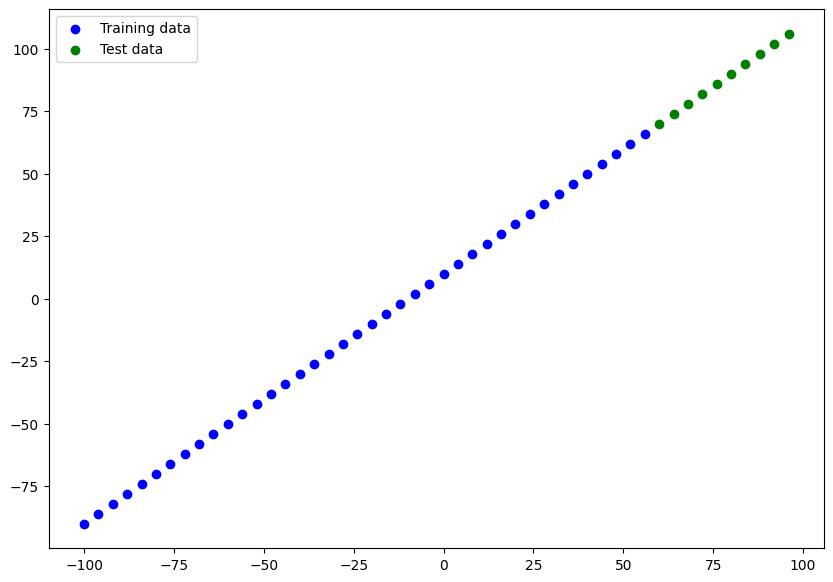

In [26]:
plt.figure(figsize=(10, 7))
# plot training data in blue
plt.scatter(x_train, y_train, c='b', label='Training data')
# plot test data
plt.scatter(x_test, y_test, c='g', label='Test data')
# show the legend
plt.legend()

## Training a neural network

In [27]:
tf.shape(x_train)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([40,  1], dtype=int32)>

In [57]:
# build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
], name='neural_network')

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [58]:
model.summary()

Model: "neural_network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 20)                40        
                                                                 
 output_layer (Dense)        (None, 1)                 21        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


🧮🔑**Note:**🔑🧮
*  Total params: Total number of parameters in the model.
*  Trainable parameters: These are the parameters (paterns) the model can update as it trains.
*  Non-trainable params: These parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **Transfer Learning**).


**Complete details about trainable parameters within a layer:**

📖**Resource:** [https://www.youtube.com/watch?v=njKP3FqW3Sk&list=PLHkKmgGGVneX2BzZVYGqcWbFw_7ymcZqv](https://www.youtube.com/watch?v=njKP3FqW3Sk&list=PLHkKmgGGVneX2BzZVYGqcWbFw_7ymcZqv)

In [59]:
# fit the model
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 44.4690 - mae: 44.4690
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 25.5065 - mae: 25.5065
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 29.5919 - mae: 29.5919
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 14.0620 - mae: 14.0620
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 19.2806 - mae: 19.2806
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.6081 - mae: 9.6081
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 10.5911 - mae: 10.5911
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 12.9159 - mae: 12.9159
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 34.0280 - mae: 34.0280
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 23.4826 - mae: 23.4826
Epoch 11/100
2/2 [==============================] - 0s 5ms/st

## Evaluating model

In [60]:
from tensorflow.keras.utils import plot_model

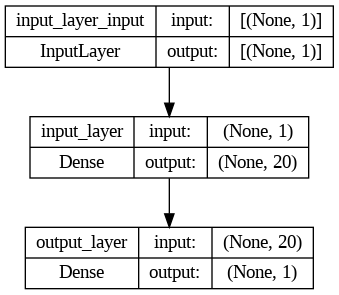

In [61]:
plot_model(model, show_shapes=True)

### Visualizing our models predictions

In [62]:
# make some prediction
y_pred = model.predict(x_test)
y_pred

1/1 [==============================] - 0s 51ms/step


array([[ 78.31976 ],
       [ 83.42299 ],
       [ 88.526215],
       [ 93.62943 ],
       [ 98.73266 ],
       [103.83589 ],
       [108.93911 ],
       [114.042336],
       [119.14556 ],
       [124.248795]], dtype=float32)

In [63]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [64]:
# let's create a ploting function
def plot_prediction(train_data=x_train, train_labels=y_train, test_data=x_test, test_labels=y_test, predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label='Training data')
  # plot testing data in green
  plt.scatter(test_data, test_labels, c='g', label='Testing data')
  # plot models prediction in red
  plt.scatter(test_data, predictions, c='r', label='Predictions')
  # show legend
  plt.legend()

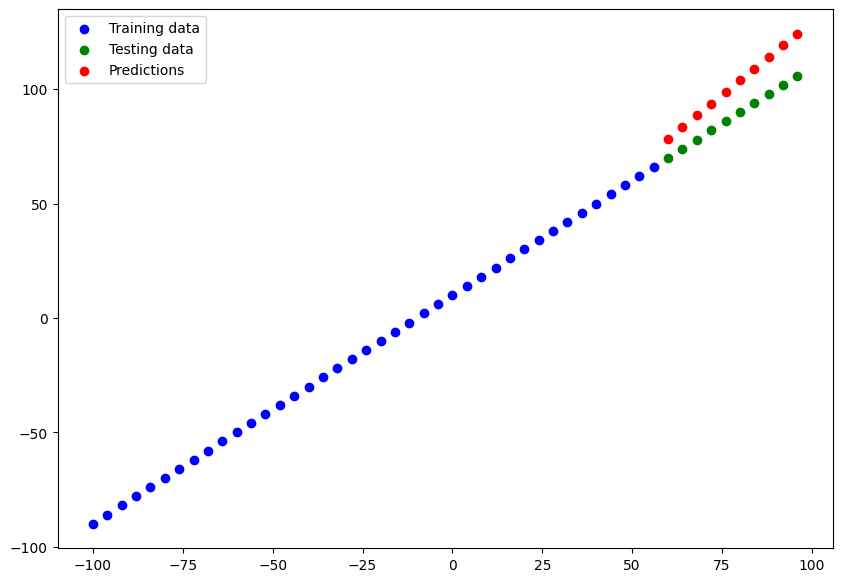

In [65]:
plot_prediction()